<a href="https://colab.research.google.com/github/Tulasi0104/LakshmiTulasi_Maradana_02562061/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset selection and loading

In [ ]:
import pandas as pd
df = pd.read_csv('/content/movie.csv', on_bad_lines='skip')
df

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


Data cleaning and preparation

Removing irrelevant characters

In [ ]:
import re
# Function to clean irrelevant characters
def clean_text(text):
    # Use regex to keep only alphanumeric characters and spaces
    return re.sub(r'[^A-Za-z0-9\s]+', '', text)

# Apply the function to a specific column, e.g., 'column_name'
df['cleaned_column'] = df['text'].apply(clean_text)

# Display the first few rows of the cleaned column
print(df[['text', 'cleaned_column']].head())

                                                text  \
0  I grew up (b. 1965) watching and loving the Th...   
1  When I put this movie in my DVD player, and sa...   
2  Why do people who do not know what a particula...   
3  Even though I have great interest in Biblical ...   
4  Im a die hard Dads Army fan and nothing will e...   

                                      cleaned_column  
0  I grew up b 1965 watching and loving the Thund...  
1  When I put this movie in my DVD player and sat...  
2  Why do people who do not know what a particula...  
3  Even though I have great interest in Biblical ...  
4  Im a die hard Dads Army fan and nothing will e...  


Normalizing text to lowercase

In [ ]:
# Normalize text to lowercase in a specific column, e.g., 'column_name'
df['lowercase_column'] = df['cleaned_column'].str.lower()

# Display the first few rows of the normalized column
print(df[['cleaned_column', 'lowercase_column']].head())

                                      cleaned_column  \
0  I grew up b 1965 watching and loving the Thund...   
1  When I put this movie in my DVD player and sat...   
2  Why do people who do not know what a particula...   
3  Even though I have great interest in Biblical ...   
4  Im a die hard Dads Army fan and nothing will e...   

                                    lowercase_column  
0  i grew up b 1965 watching and loving the thund...  
1  when i put this movie in my dvd player and sat...  
2  why do people who do not know what a particula...  
3  even though i have great interest in biblical ...  
4  im a die hard dads army fan and nothing will e...  


Tokenization

In [ ]:
!pip install nltk

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Download the necessary resources for tokenization
nltk.download('punkt')

# Function to tokenize text
def tokenize_text(lowercase_column):
    return word_tokenize(lowercase_column)

# Apply the function to a specific column, e.g., 'column_name'
df['tokenized_column'] = df['lowercase_column'].apply(tokenize_text)

# Display the first few rows of the tokenized column
print(df[['lowercase_column', 'tokenized_column']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                    lowercase_column  \
0  i grew up b 1965 watching and loving the thund...   
1  when i put this movie in my dvd player and sat...   
2  why do people who do not know what a particula...   
3  even though i have great interest in biblical ...   
4  im a die hard dads army fan and nothing will e...   

                                    tokenized_column  
0  [i, grew, up, b, 1965, watching, and, loving, ...  
1  [when, i, put, this, movie, in, my, dvd, playe...  
2  [why, do, people, who, do, not, know, what, a,...  
3  [even, though, i, have, great, interest, in, b...  
4  [im, a, die, hard, dads, army, fan, and, nothi...  


Word frequency analysis

Calculation of word frequency

In [ ]:
!pip install nltk wordcloud matplotlib


In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Flatten the list of tokens and count word frequencies
all_words = [word.lower() for tokens in df['tokenized_column'] for word in tokens]
word_freq = Counter(all_words)
word_freq



Counter({'i': 122017,
         'grew': 367,
         'up': 19348,
         'b': 959,
         '1965': 56,
         'watching': 7210,
         'and': 256917,
         'loving': 436,
         'the': 531220,
         'thunderbirds': 56,
         'all': 36212,
         'my': 19744,
         'mates': 100,
         'at': 37277,
         'school': 2579,
         'watched': 3571,
         'we': 15236,
         'played': 4084,
         'before': 6718,
         'during': 3515,
         'lunch': 97,
         'after': 11787,
         'wanted': 2164,
         'to': 213655,
         'be': 42202,
         'virgil': 20,
         'or': 28031,
         'scott': 784,
         'no': 19696,
         'one': 40851,
         'alan': 448,
         'counting': 62,
         'down': 5564,
         'from': 32384,
         '5': 1482,
         'became': 1068,
         'an': 34281,
         'art': 1748,
         'form': 1142,
         'took': 1790,
         'children': 2046,
         'see': 18006,
         'movie': 6

Visualization

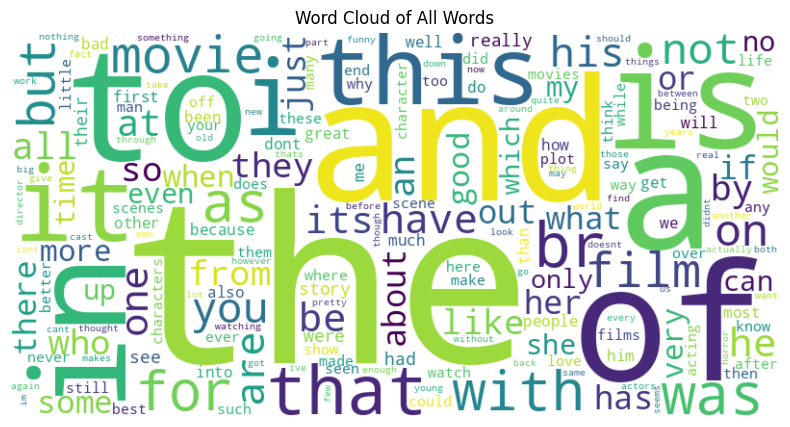

In [ ]:
# Step 3: Visualization

# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Words')
plt.show()

Sentiment Analysis

In [ ]:
positive_words = ['good', 'great', 'excellent', 'awesome', 'fantastic', 'amazing', 'love', 'like', 'positive', 'wonderful']
negative_words = ['bad', 'terrible', 'awful', 'worst', 'hate', 'dislike', 'horrible', 'negative', 'poor', 'disappointing']

# Function to calculate sentiment score
def calculate_sentiment(tokens):
    # tokens is already a list of words, no need to tokenize again
    positive_count = sum([1 for word in tokens if word in positive_words])
    negative_count = sum([1 for word in tokens if word in negative_words])

    # Calculate sentiment score
    sentiment_score = positive_count - negative_count

    return sentiment_score

# Apply the sentiment analysis function to the tokenized text column
df['sentiment_score'] = df['tokenized_column'].apply(calculate_sentiment)

# Display the first few rows with the sentiment scores
print(df[['tokenized_column', 'sentiment_score']].head())

                                    tokenized_column  sentiment_score
0  [i, grew, up, b, 1965, watching, and, loving, ...               -1
1  [when, i, put, this, movie, in, my, dvd, playe...                5
2  [why, do, people, who, do, not, know, what, a,...                2
3  [even, though, i, have, great, interest, in, b...               -1
4  [im, a, die, hard, dads, army, fan, and, nothi...                4
